## Dataset

En esta notebook trabajaremos con el mismo dataset utilizado en el TP 4.1, conocido como [palmerpenguins](https://allisonhorst.github.io/palmerpenguins/).

El dataset continee datos de 344 pingüinos de 3 especies diferentes (Adelie, Chinstrap y Gentoo), recopilados de 3 islas (Torgersen, Biscoe y Dream) en el Archipiélago Palmer, Antártida.





Carguemos las librerías estándar y el dataframe de Seaborn.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset("penguins")

Recordemos que el dataset tiene algunos datos faltantes, por lo que eliminamos las correspondientes filas:

In [ ]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


En este trabajo práctico aplicaremos distintas estrategias de **clustering** y realizaremos una evaluación extrínseca de los resultados. Utilizaremos las métricas de *pureza* y *pureza inversa* para medir homogeneidad y completitud, respectivamente. También reportaremos la *media armónica* de estas dos métricas. 
A continuación definimos las funciones necesarias para calcular estas métricas. 

In [ ]:
import numpy as np
from sklearn import metrics

# pureza (purity) para medir homogeneidad de cada cluster respecto a las clases definidas
def purity(y_true, y_pred): 
    cm = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)

# pureza inversa (inverse_purity) para medir completitud de cada cluster respecto a las clases definidas
def inverse_purity(y_true, y_pred):
    cm = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(cm, axis=1)) / np.sum(cm) 

# media armónica (harmonic_mean) entre pureza y pureza inversa
def harmonic_mean(y_true, y_pred):
    return 2*purity(y_true, y_pred)*inverse_purity(y_true, y_pred) /(purity(y_true, y_pred)+inverse_purity(y_true, y_pred))              

A continuación, presentamos una serie de pasos para ejemplificar el tipo de análisis que llevaremos a cabo. 

**Paso 1: Inspección de Datos.** Inspeccionamos visualmente si los atributos *bill_length_mm* y *bill_depth_mm* nos permiten crear un buen agrupamiento de *species*.

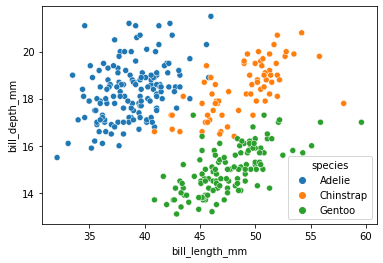

In [ ]:
sns.scatterplot(x=df['bill_length_mm'], y=df['bill_depth_mm'], hue = df['species'])

Tengamos en cuenta que nuestro algoritmo de clustering no tendrá acceso a la información de la etiqueta *species*, por lo que los datos de entrenamiento se pueden visualizar como sigue.

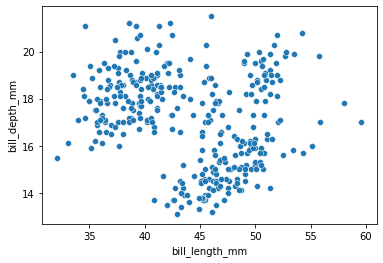

In [ ]:
sns.scatterplot(x=df['bill_length_mm'], y=df['bill_depth_mm'])

**Paso 2: Estandarización.** La mayoría de los algoritmos de clustering  funcionan mejor en la mayoría de los datasets si estandarizamos los atributos. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[['bill_length_mm','bill_depth_mm']])

**Paso 3: Entrenamiento y Predicción.** Utilizamos ``KMeans`` disponible en ScikitLearn para agrupar los datos en 3 clusters.

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
y_pred = model.fit_predict(X)

**Paso 4: Evaluación Extrínseca.** Realizamos una evaluación extrínseca de los resulados obtenidos.

Contrastamos visualmente las tres clases reales según la etiqueta *species* (y_true) con los clusters generados (y_pred). 

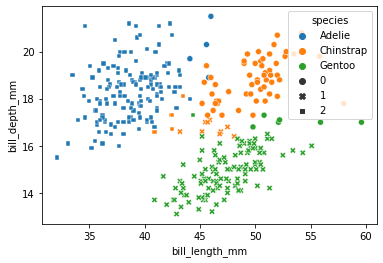

In [ ]:
y_true = df['species']
sns.scatterplot(x=df['bill_length_mm'], y=df['bill_depth_mm'], hue = y_true, style = y_pred )

Contrastamos las clases reales y los clusters generados mediante tabulación cruzada.

In [ ]:
matrix = pd.DataFrame({'labels': y_pred, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0             4         54       6
1             0          9     112
2           142          5       1


Reportamos las métricas de pureza, pureza inversa y su media armónica.

In [ ]:
print("Homogeneidad basada en pureza: ", purity(y_true, y_pred))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true, y_pred))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true, y_pred))

Homogeneidad basada en pureza:  0.924924924924925
Completitud basada en pureza inversa:  0.924924924924925
Media armónica de homogeneidad y completitud:  0.924924924924925



---

###1.  Repita los pasos anteriores para entrenar al algoritmo ``KMeans`` utilizando los atributos *flipper_length_mm* y *body_mass_g*. ¿Qué tan efectivos son estos dos atributos para crear un agrupamiento (no supervisado) que refleje el agrupamiento real según la etiqueta *species*?





Homogeneidad basada en pureza:  0.7057057057057057
Completitud basada en pureza inversa:  0.7387387387387387
Media armónica de homogeneidad y completitud:  0.7218445056282893


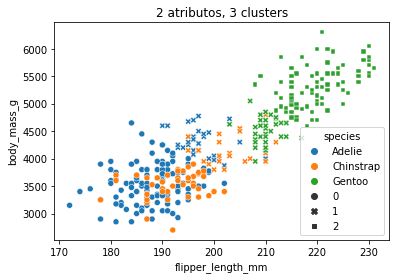

In [ ]:
X_1 = scaler.fit_transform(df[['flipper_length_mm', 'body_mass_g']])
model_1 = KMeans(n_clusters=3)
y_pred_1 = model_1.fit_predict(X_1)
y_true_1 = df['species']
sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'],
                hue= y_true_1,
                style= y_pred_1).set(title="2 atributos, 3 clusters")
print("Homogeneidad basada en pureza: ", purity(y_true_1, y_pred_1))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true_1, y_pred_1))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true_1, y_pred_1))

Los atributos de flipper_length_mm y body_mass_g son bastante malos para separar a las especies en clusters. Esto se puede deducir primero que nada de las métricas de homogeneidad y completitud, cuyo media armónica aritmética es cercana a 0.72, representando que cada cluster tiene varios elementos de una clase distinta a la que representa la mayoría de los puntos de ese cluster, lo que va en contra de la homogeneidad.
Del análisis visual, podemos inferir que se da frecuentemente que para cada cluster, hay más de una especie por cada uno, y que hay una gran superposición entre las especies adelie y Chinstrap, que evidentemente tienen 'flipper_length_mm' y 'body_mass_g' parecidos.

---
###2. Volvamos a considerar los atributos *flipper_length_mm* y *body_mass_g*. ¿Qué ocurre si el algoritmo ``KMeans`` intenta obtener 2 clusters en lugar de 3 clusters?  ¿Cómo se modifica el análsis si ``KMeans`` intenta obtener 4 clusters?

Homogeneidad basada en pureza:  0.7867867867867868
Completitud basada en pureza inversa:  0.975975975975976
Media armónica de homogeneidad y completitud:  0.8712289802579412


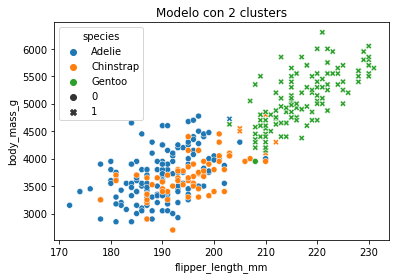

In [ ]:
X_2 = scaler.fit_transform(df[['flipper_length_mm', 'body_mass_g']])
model_2 = KMeans(n_clusters=2)
y_pred_2 = model_2.fit_predict(X_2)
y_true_2 = df['species']
sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'],
                hue= y_true_2,
                style= y_pred_2).set(title="Modelo con 2 clusters")
print("Homogeneidad basada en pureza: ", purity(y_true_2, y_pred_2))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true_2, y_pred_2))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true_2, y_pred_2))


Homogeneidad basada en pureza:  0.7807807807807807
Completitud basada en pureza inversa:  0.5405405405405406
Media armónica de homogeneidad y completitud:  0.6388206388206388


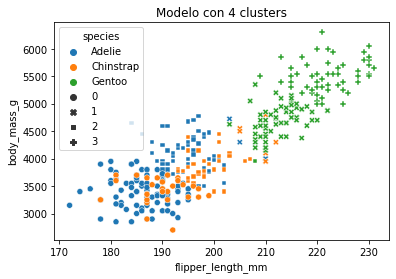

In [ ]:
X_3 = scaler.fit_transform(df[['flipper_length_mm', 'body_mass_g']])
model_3 = KMeans(n_clusters=4)
y_pred_3 = model_3.fit_predict(X_3)
y_true_3 = df['species']
sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'],
                hue= y_true_3,
                style= y_pred_3).set(title="Modelo con 4 clusters")
print("Homogeneidad basada en pureza: ", purity(y_true_3, y_pred_3))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true_3, y_pred_3))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true_3, y_pred_3))

Cuando entrenamos un modelo con dos clusters en lugar de tres, se evidencia que los atributos elegidos son buenos para diferenciar la clase Gentoo del resto. Vemos una homogeneidad relativamente mala dada por el cluster 0 que mezcla todas las muestras de Adelie y Chinstrap, a pesar de que el cluster 1 es perfectamente homogéneo. La completitud es muy buena porque la clase gentoo está representada por un único cluster, y las de Adelie y Chinstrap también.
Al utilizar 4 clusters, llegamos a la peor de las soluciones evidenciado en las métricas. Tenemos que los clusters 0, 1 y 2, están completamente superpuestos y mezclan al mismo tiempo distintas clases dentro de cada uno. Como si esto fuera poco, las clases no están completamente contenidas en los clusters, afectando fuertemente a la métrica de completitud.

---
###3. Utilice todos los atributos númericos (*bill_length_mm*, *bill_depth_mm*, *flipper_length_mm*  y *body_mass_g*) para entrenar al algoritmo ``KMeans`` con el objetivo de obtener 3 clusters y realice una evaluación extrínseca utilizando tabulación cruzada y calculando las métricas de *pureza*, *pureza inversa* y su *media armónica*. Compare los resultados con los obtenidos en los incisos anteriores.


In [ ]:
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
import matplotlib.pyplot as plt 

X_4 = scaler.fit_transform(df[['flipper_length_mm',
                               'body_mass_g',
                               'bill_length_mm',
                               'bill_depth_mm']])
model_4 = KMeans(n_clusters=3)
y_pred_4 = model_4.fit_predict(X_4)
y_true_4 = df['species']
# sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'],
#                 hue= y_true_4,
#                 style= y_pred_4).set(title="Modelo con 4 atributos, y 3 clusters")
print("Homogeneidad basada en pureza: ", purity(y_true_4, y_pred_4))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true_4, y_pred_4))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true_4, y_pred_4))

matrix = pd.DataFrame({'labels': y_pred_4, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

Homogeneidad basada en pureza:  0.918918918918919
Completitud basada en pureza inversa:  0.918918918918919
Media armónica de homogeneidad y completitud:  0.918918918918919
species  Adelie  Chinstrap  Gentoo
labels                            
0           124          5       0
1             0          0     119
2            22         63       0


Comparativamente a los incisos anteriores, hemos obtenido las mejores métricas de homogeneidad y completitud. Esto se debe en parte por la correcta configuración de la cantidad de clusters, y por la cantidad de atributos que ahora se está analizando. Sorpresivamente, este modelo no performa mejor que el propuesto en la explicación inicial del trabajo práctico, el cual logra una media armónica de 0.92 con solo dos atributos. Definitivamente uno de los 4 atributos que está agregando ruido a la clasificación.
Analizando la tabulación cruzada, vemos que las especies mas conflictivas son Adelie y Chinstrap, las cuales se mezclan en el cluster #2, que mayoritariamente representa a los Chinstrap.



---
###4. Utilice los atributos *bill_length_mm* y *bill_depth_mm* para entrenar al algoritmo ``DBSCAN`` de *ScikitLearn* con *eps=0.3* y *min_samples=7*.  Realice una evaluación extrínseca utilizando tabulación cruzada y calculando las métricas de *pureza*, *pureza inversa* y su *media armónica*. 
###*Observación:* por convención, si el algoritmo identifica elementos outliers puede asumir que los mismos se agrupan en un único cluster de outliers (cluster denominado -1).  Compare los resultados con los obtenidos por el algoritmo ``KMeans``.

Homogeneidad basada en pureza:  0.9129129129129129
Completitud basada en pureza inversa:  0.7957957957957958
Media armónica de homogeneidad y completitud:  0.8503406745937502
species  Adelie  Chinstrap  Gentoo
labels                            
-1           20          9      12
 0          126          5       0
 1            0         19       1
 2            0         33       0
 3            0          2     106


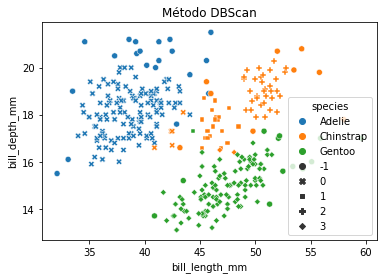

In [ ]:
from sklearn.cluster import DBSCAN

X_5 = scaler.fit_transform(df[['bill_length_mm', 'bill_depth_mm']])
model_5 =  DBSCAN(eps=0.3, min_samples=7)
y_true_5 = df['species']
y_pred_5 = model_5.fit_predict(X_5)
sns.scatterplot(x=df['bill_length_mm'], y=df['bill_depth_mm'],
                hue= y_true_5,
                style= y_pred_5).set(title="Método DBScan")
print("Homogeneidad basada en pureza: ", purity(y_true_5, y_pred_5))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true_5, y_pred_5))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true_5, y_pred_5))

matrix = pd.DataFrame({'labels': y_pred_5, 'species': y_true_5 })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

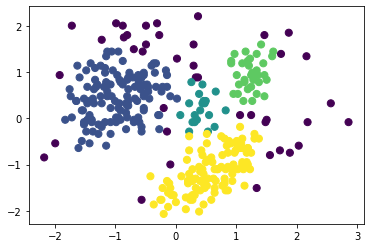

In [ ]:
plt.scatter(X_5[:, 0], X_5[:, 1], c=y_pred_5,
            s=50, cmap='viridis');

Las métricas obtenidas de homogeneidad y completitud no superan a las del método KMeans con 3 clusters. Lo positivo de DBScan en mi opinión, es que detectó los outliers que podrían estar ensuciando el modelo. En la tabulación cruzada, si se hacen a un lado los outliers identificados en el cluster -1 y si agrupamos los clusters 1 y 2, tendriamos identificada a la especie Chinstrap de una mejor manera que con los otros modelos.

###5. Utilice el estimador PCA de ScikitLearn para identificar de manera sucesiva los primeros 1, 2, 3 y 4 componentes principales en el espacio de las cuatro dimensiones numéricas *bill_length_mm*, *bill_depth_mm*, *flipper_length_mm* y *body_mass_g*. Recuerde estandarizar los datos antes de entrenar al estimador. Muestre los valores de los parámetros aprendidos ``components_`` y ``explained_variance_`` en cada caso. Explique qué representan dichos parámetros. 

In [ ]:
from sklearn.decomposition import PCA

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

def draw_pca(input_X, n, draw=True):
    pca = PCA(n_components=n)
    projected = pca.fit_transform(input_X)
    print("Componentes:")
    print(pca.components_)
    print("Varianza:")
    print(pca.explained_variance_)
    if draw:
        colormap = {"Adelie": "blue", "Chinstrap":"red", "Gentoo":"green"}
        plt.scatter(projected[:, 0], projected[:, 1] if n>1 else np.zeros(projected[:, 0].shape),
                    edgecolor='none', alpha=0.5,
                    c=y_true.replace(colormap),)
        plt.xlabel('component 1')
        plt.ylabel('component 2')
        plt.title(f"Componentes: {n} , Features: {input_X.shape[1]}")
    return projected


Componentes:
[[ 0.576825    0.54967471  0.45375317 -0.39904723]]
Varianza:
[2.75362487]


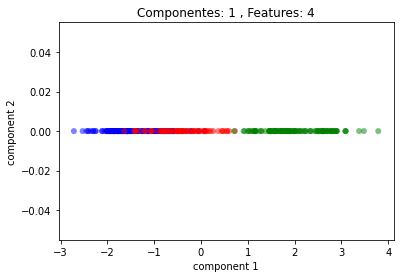

In [ ]:
X_features_4 = scaler.fit_transform(df[['flipper_length_mm',
                               'body_mass_g',
                               'bill_length_mm',
                               'bill_depth_mm']])
projected_1 = draw_pca(X_features_4, 1)


Componentes:
[[ 0.576825    0.54967471  0.45375317 -0.39904723]
 [ 0.00578817  0.07646366  0.6001949   0.79616951]]
Varianza:
[2.75362487 0.7804609 ]


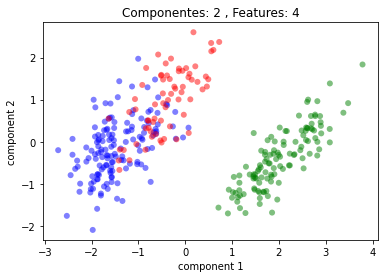

In [ ]:
projected_2 = draw_pca(X_features_4, 2)

Componentes:
[[ 0.576825    0.54967471  0.45375317 -0.39904723]
 [ 0.00578817  0.07646366  0.6001949   0.79616951]
 [-0.23609516 -0.59173738  0.64249509 -0.42580043]]
Varianza:
[2.75362487 0.7804609  0.36975289]


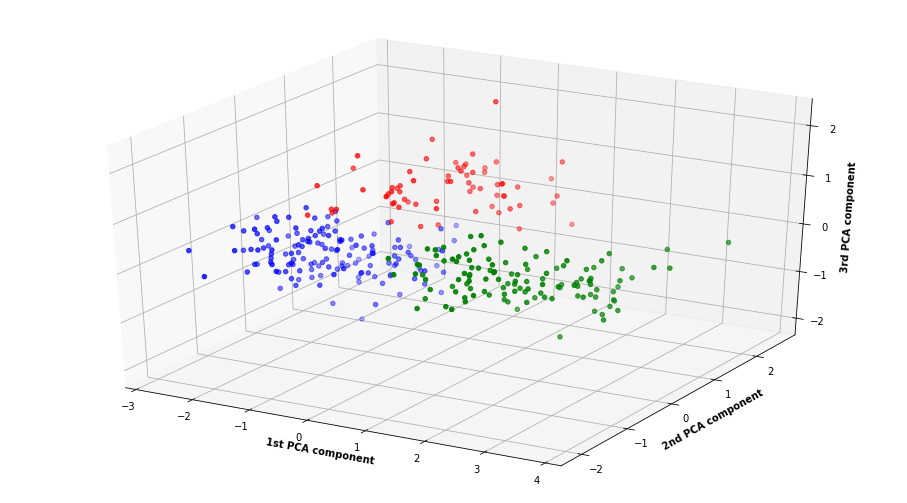

In [ ]:
def plot_3d_pca(projected, y_true, c):
    x = projected[:, 0]
    y = projected[:, 1]
    z = projected[:, 2]
    plt.figure(figsize = (16, 9))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(x, y, z, c=c)
    
    ax.set_xlabel('1st PCA component', fontweight ='bold')
    ax.set_ylabel('2nd PCA component', fontweight ='bold')
    ax.set_zlabel('3rd PCA component', fontweight ='bold')

    plt.show()

colormap = {"Adelie": "blue", "Chinstrap":"red", "Gentoo":"green"}
projected_3 = draw_pca(X_features_4, 3, draw=False) # 2d
plot_3d_pca(projected_3, y_true, y_true.replace(colormap))

In [ ]:
import plotly
import plotly.express as px

def plot_5d(projected, y_true, c, y_pred):
    marker_map = {
        0: "circle",
        1: "square",
        2: "cross"
    }
    fig1 = px.scatter_3d(x = projected[:, 0],
                        y = projected[:, 1],
                        z = projected[:, 2],
                        color = c,
                        symbol = y_pred,
                        size_max=10)
    fig1.show()

In [ ]:
projected_4 = draw_pca(X_features_4, 4, draw=False) # 2d


Componentes:
[[ 0.576825    0.54967471  0.45375317 -0.39904723]
 [ 0.00578817  0.07646366  0.6001949   0.79616951]
 [-0.23609516 -0.59173738  0.64249509 -0.42580043]
 [-0.78198369  0.58468615  0.14516955 -0.1599044 ]]
Varianza:
[2.75362487 0.7804609  0.36975289 0.10820954]


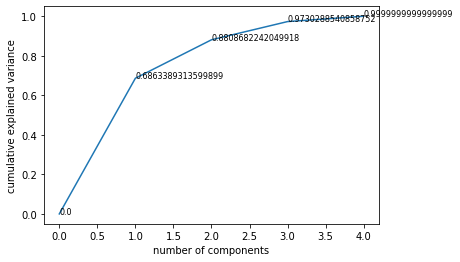

In [ ]:
pca = PCA().fit(X_features_4)

x_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
x_variance_ratio = np.insert(x_variance_ratio,0,0)
fig, ax = plt.subplots()
plt.plot(x_variance_ratio)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
for index in range(len(x_variance_ratio)):
  ax.text(index, x_variance_ratio[index], x_variance_ratio[index], size=8)

Vector de componentes:
`[ x1 * flipper_length_mm , x2 * body_mass_g , x3 * bill_length_mm , x4 * bill_depth_mm ] `

Del primer componente del PCA, podemos decir que el vector encontrado `[ 0.576825    0.54967471  0.45375317 -0.39904723]` , va en dirección hacia los atributos de 'flipper_length_mm', 'body_mass_g' y 'bill_length_mm' y en dirección opuesta al atributo 'bill_depth_mm', significando que este último no explica la variación en la mayor parte de los datos. De la varianza, podemos decir que este vector es el que captura la mayoría de los casos, es decir, un 68.6% de la distribución puede ser explicada por solo este vector.
Cuando analizamos el segundo componente, `[ 0.00578817  0.07646366  0.6001949   0.79616951]` , nos damos cuenta que utilizando el bill_length_mm y el bill_depth_mm podemos llegar a explicar hasta un 88% de la variabilidad. El tercer componente nos indica que el bill_length_mm va a ser lo que mas nos va a permitir discriminar, dados los otros dos vectores iniciales.
Ya teniendo en cuenta 3 componentes, podemos explicar el 97% de la variabilidad de los datos.


###6. Utilice de manera sucesiva los primeros 1, 2, 3 y 4 componentes principales identificadas en el inciso anterior para entrenar al algoritmo ``KMeans`` con el objetivo de obtener 3 clusters. Realice una evaluación extrínseca utilizando tabulación cruzada y calculando las métricas de pureza, pureza inversa y su media armónica. Determine si la aplicación de PCA da lugar a algun tipo de mejora en los resultados obtenidos. 

Homogeneidad basada en pureza:  0.8588588588588588
Completitud basada en pureza inversa:  0.8588588588588588
Media armónica de homogeneidad y completitud:  0.8588588588588588
 ---- Tabulación cruzada ----
species  Adelie  Chinstrap  Gentoo
labels                            
0             0          0     118
1            37         59       1
2           109          9       0


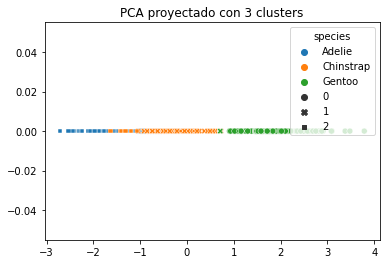

In [ ]:
kmeans_pca = KMeans(n_clusters=3)
y_pred_pca_1 = kmeans_pca.fit_predict(projected_1)
colormap = {"Adelie": "blue", "Chinstrap":"red", "Gentoo":"green"}
sns.scatterplot(x=projected_1[:, 0], y=np.zeros(projected_1[:, 0].shape),
                hue= y_true,
                style= y_pred_pca_1).set(title="PCA proyectado con 3 clusters")
print("Homogeneidad basada en pureza: ", purity(y_true, y_pred_pca_1))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true, y_pred_pca_1))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true, y_pred_pca_1))
print(" ---- Tabulación cruzada ----")
matrix = pd.DataFrame({'labels': y_pred_pca_1, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

Homogeneidad basada en pureza:  0.8798798798798799
Completitud basada en pureza inversa:  0.8798798798798799
Media armónica de homogeneidad y completitud:  0.87987987987988
 ---- Tabulación cruzada ----
species  Adelie  Chinstrap  Gentoo
labels                            
0            32         60       0
1             0          0     119
2           114          8       0


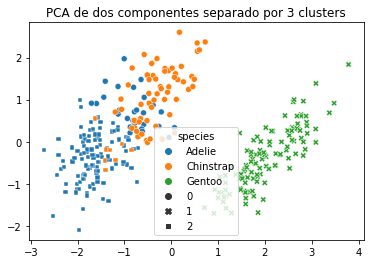

In [ ]:
kmeans_pca = KMeans(n_clusters=3)
y_pred_pca_2 = kmeans_pca.fit_predict(projected_2)
colormap = {"Adelie": "blue", "Chinstrap":"red", "Gentoo":"green"}
sns.scatterplot(x=projected_2[:, 0], y=projected_2[:, 1],
                hue= y_true,
                style= y_pred_pca_2).set(title="PCA de dos componentes separado por 3 clusters")

print("Homogeneidad basada en pureza: ", purity(y_true, y_pred_pca_2))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true, y_pred_pca_2))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true, y_pred_pca_2))

print(" ---- Tabulación cruzada ----")
matrix = pd.DataFrame({'labels': y_pred_pca_2, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

In [ ]:
kmeans_pca = KMeans(n_clusters=3)
y_pred_pca_3 = kmeans_pca.fit_predict(projected_3)

plot_5d(projected_3, y_true, y_true.replace(colormap), y_pred)

print("Homogeneidad basada en pureza: ", purity(y_true, y_pred_pca_3))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true, y_pred_pca_3))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true, y_pred_pca_3))

print(" ---- Tabulación cruzada ----")
matrix = pd.DataFrame({'labels': y_pred_pca_3, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

Homogeneidad basada en pureza:  0.9219219219219219
Completitud basada en pureza inversa:  0.9219219219219219
Media armónica de homogeneidad y completitud:  0.9219219219219219
 ---- Tabulación cruzada ----
species  Adelie  Chinstrap  Gentoo
labels                            
0             0          0     119
1           125          5       0
2            21         63       0


In [ ]:
def comparativa_metricas(y_pred_comp, title):
    print(f"{title}")
    matrix = pd.DataFrame({'labels': y_pred_comp, 'species': y_true })
    ct = pd.crosstab(matrix['labels'], matrix['species'])
    print(ct)
    print("Homogeneidad basada en pureza: ", purity(y_true, y_pred_comp))
    print("Completitud basada en pureza inversa: ", inverse_purity(y_true, y_pred_comp))
    print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true, y_pred_comp))
    print("----------------------------------")
a_comparar = {
    "3 KMEANS CLUSTERS SIN PCA": y_pred_4,
    "DBSCAN": y_pred_5,
    "3 KMEANS ClUSTERS CON PCA DE 1 COMPONENTE": y_pred_pca_1,
    "3 KMEANS ClUSTERS CON PCA DE 2 COMPONENTES": y_pred_pca_2,
    "3 KMEANS ClUSTERS CON PCA DE 3 COMPONENTES": y_pred_pca_3,
    }
for key,value in a_comparar.items():
    comparativa_metricas(value, key)

3 KMEANS CLUSTERS SIN PCA
species  Adelie  Chinstrap  Gentoo
labels                            
0           124          5       0
1             0          0     119
2            22         63       0
Homogeneidad basada en pureza:  0.918918918918919
Completitud basada en pureza inversa:  0.918918918918919
Media armónica de homogeneidad y completitud:  0.918918918918919
----------------------------------
DBSCAN
species  Adelie  Chinstrap  Gentoo
labels                            
-1           20          9      12
 0          126          5       0
 1            0         19       1
 2            0         33       0
 3            0          2     106
Homogeneidad basada en pureza:  0.9129129129129129
Completitud basada en pureza inversa:  0.7957957957957958
Media armónica de homogeneidad y completitud:  0.8503406745937502
----------------------------------
3 KMEANS ClUSTERS CON PCA DE 1 COMPONENTE
species  Adelie  Chinstrap  Gentoo
labels                            
0             0   

En base a la tabulación cruzada y a los resultados de homogeneidad y completitud de cada uno de los métodos, podemos decir que haber hecho un PCA de 3 componentes previo al KMEANS, ayudó a mejorar la clasificación. 
Esto es así, por la reducción de dimensionalidad del PCA, que basada en 4 atributos, encontró un espacio tridimensional, en el cual hacer KMeans cluster es mas fácil.